In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, InputLayer,Embedding,SpatialDropout1D
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import json

In [34]:
with open("config.json", "r") as f:
    config = json.load(f)

In [35]:
model_config = config["models"]
model_config

{'enabled': True,
 'model_name': 'Cases',
 'model': {'type': 'neural_net',
  'alpha': 1e-06,
  'hidden_layer_sizes': 5000,
  'learning_rate_init': 0.01,
  'max_iter': 100000,
  'batch_size': 32,
  'tol': 1e-06,
  'n_iter_no_change': 250,
  'verbose': False},
 'datagrabber_class': 'CasesDataGrabber',
 'grab_data_from_server': True,
 'offline_dataset_date': '2020-09-26',
 'days_to_predict': 10}

In [78]:
df = pd.read_csv('Confirmed_Cases_US_Vaccinated_NewDataset.csv').drop(columns=['Unnamed: 0'])
df

,ObservationDate,Confirmed,People_Fully_Vaccinated
0,2020-01-22,1.0,0.0
1,2020-01-23,1.0,0.0
2,2020-01-24,2.0,0.0
3,2020-01-25,2.0,0.0
4,2020-01-26,5.0,0.0
...,...,...,...
462,2021-04-28,32230850.0,199426393.0
463,2021-04-29,32289049.0,202713598.0
464,2021-04-30,32346971.0,206220484.0
465,2021-05-01,32392274.0,210278776.0


In [79]:
## Use the data from April to May as test
df[df['ObservationDate']=='2021-04-01'].index

Int64Index([435], dtype='int64')

In [80]:
x = np.array(df.iloc[:467,:].index.values.tolist()).reshape(-1, 1)
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [101]:
list = []
for i in range(0,32):
    list.append(300 +i)
x_pred = np.array(list).reshape(-1, 1)
x_pred

array([[300],
       [301],
       [302],
       [303],
       [304],
       [305],
       [306],
       [307],
       [308],
       [309],
       [310],
       [311],
       [312],
       [313],
       [314],
       [315],
       [316],
       [317],
       [318],
       [319],
       [320],
       [321],
       [322],
       [323],
       [324],
       [325],
       [326],
       [327],
       [328],
       [329],
       [330],
       [331]])

In [102]:
y_v_train = df.iloc[:467,-1]
y_v_train

0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
          ...     
462    199426393.0
463    202713598.0
464    206220484.0
465    210278776.0
466    213016060.0
Name: People_Fully_Vaccinated, Length: 467, dtype: float64

In [103]:
y_train = []

for elem in y_v_train:
    y_train_tmp = []
    y_train_tmp.append(elem)
    y_train.append(y_train_tmp)

y_train_np = np.array(y_train)
y_train_np

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


In [104]:
y_v_train = df.iloc[:467,-1]
y_v_train

0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
          ...     
462    199426393.0
463    202713598.0
464    206220484.0
465    210278776.0
466    213016060.0
Name: People_Fully_Vaccinated, Length: 467, dtype: float64

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y_v_train, test_size=0.1)

In [106]:
activation="relu"
loss="binary_crossentropy"
metrics=['accuracy']
optimizer='adam'
epochs=20

In [107]:
TFmodel= Sequential()
TFmodel.add(Embedding(50000, 64, input_length=1))
TFmodel.add(SpatialDropout1D(0.2))
TFmodel.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
TFmodel.add(Dense(11, activation=activation))
TFmodel.compile(loss=loss, metrics=metrics, optimizer=optimizer)

In [108]:
tensorboard = TensorBoard(log_dir='logs')
earlystopping = EarlyStopping(mode='min', patience=3, restore_best_weights=True)
history = TFmodel.fit(x_train,y_train,epochs=epochs, batch_size=64, callbacks=[tensorboard,earlystopping], validation_split=0.1)

Epoch 1/20
6/6 [==============================] - 3s 156ms/step - loss: 168140598.8571 - accuracy: 0.0575 - val_loss: 161006640.0000 - val_accuracy: 0.0238
Epoch 2/20
6/6 [==============================] - 0s 39ms/step - loss: 108732729.1429 - accuracy: 0.0550 - val_loss: 132770392.0000 - val_accuracy: 0.0714
Epoch 3/20
6/6 [==============================] - 0s 39ms/step - loss: 89748338.2857 - accuracy: 0.0955 - val_loss: 120307504.0000 - val_accuracy: 0.0952
Epoch 4/20
6/6 [==============================] - 0s 38ms/step - loss: 80385550.2857 - accuracy: 0.1371 - val_loss: 114533960.0000 - val_accuracy: 0.2143
Epoch 5/20
6/6 [==============================] - 0s 38ms/step - loss: 76559142.8571 - accuracy: 0.1599 - val_loss: 110678136.0000 - val_accuracy: 0.2619
Epoch 6/20
6/6 [==============================] - 0s 42ms/step - loss: 65938706.8571 - accuracy: 0.2499 - val_loss: 107910312.0000 - val_accuracy: 0.2857
Epoch 7/20
6/6 [==============================] - 0s 39ms/step - loss: 71

In [109]:
y_v_pred = TFmodel.predict(x_pred)
y_v_pred

array([[0.02996007, 0.00922558, 0.02502369, 0.00464239, 0.03299187,
        0.02832878, 0.01045722, 0.01354027, 0.01868276, 0.01737005,
        0.00775239],
       [0.02260315, 0.01390856, 0.00961907, 0.        , 0.02553372,
        0.02251628, 0.01208354, 0.00289502, 0.02370744, 0.02072209,
        0.01174609],
       [0.0302168 , 0.        , 0.01031494, 0.00583455, 0.02709237,
        0.02133207, 0.01702396, 0.00514618, 0.01900567, 0.0195627 ,
        0.00420978],
       [0.02098107, 0.01502601, 0.00086975, 0.00151588, 0.03205256,
        0.01905117, 0.00785806, 0.00491057, 0.01875549, 0.01797602,
        0.00140408],
       [0.0296966 , 0.00416403, 0.01397097, 0.00439444, 0.02729799,
        0.00993603, 0.01041076, 0.01111255, 0.02345135, 0.02574915,
        0.        ],
       [0.01745594, 0.01536643, 0.00999532, 0.00404644, 0.03372064,
        0.01644447, 0.02194318, 0.01061014, 0.02050483, 0.0237058 ,
        0.00220474],
       [0.04132195, 0.01118383, 0.0178658 , 0.00251421, 0.

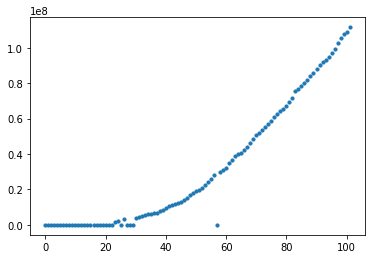

In [75]:
plt.scatter(x, y_v_train, s=10)

In [96]:
y_v_test = df.iloc[102:,-1]
y_v_test

102            0.0
103            0.0
104            0.0
105            0.0
106            0.0
          ...     
462    199426393.0
463    202713598.0
464    206220484.0
465    210278776.0
466    213016060.0
Name: People_Fully_Vaccinated, Length: 365, dtype: float64

In [97]:
plt.plot(x_pred, y_v_pred, color='m', label="Predicted Vaccination")
plt.plot(x_pred, y_v_test, color='r',label="Real Vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("vaccination")
plt.show()

NameError: name 'y_v_pred' is not defined

In [ ]:
y_c_train = df.iloc[:102,1]
vaccination = df.iloc[:102,-1]
vaccination

In [ ]:
x_c_train = np.vstack((np.array(df.iloc[:102,:].index.values.tolist()), vaccination)).T
x_c_train

In [ ]:
plt.scatter(x,y_c_train,s=10)

In [ ]:
neural_net_model = NeuralNetModel(model_config["model_name"])
neural_net_model.train(x_c_train, y_c_train, model_config["model"])

In [ ]:
x_c_test = np.vstack((np.array(list), y_v_pred)).T
x_c_test

In [ ]:
y_c_pred = neural_net_model.get_predictions(x_c_test)
y_c_pred

In [ ]:
x_c_test_real = np.vstack((np.array(list), np.array(y_v_test.tolist()))).T
x_c_test_real

In [ ]:
y_c_pred_real = neural_net_model.get_predictions(x_c_test_real)
y_c_pred_real

In [ ]:
y_c_test = df.iloc[102:,1]
y_c_test

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(x_pred, y_c_test, color='r', label="Real confirmed cases")
plt.plot(x_pred,y_c_pred,color='b', label="predicted confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")

plt.subplot(1,2,2)
plt.plot(x_pred, y_c_test, color='r', label="Real confirmed cases")
plt.plot(x_pred,y_c_pred_real,color='b', label="predicted confirmed cases with real vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")

plt.show()

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(x_pred, y_v_pred, color='r', label="predicted vaccination")
plt.plot(x_pred,y_c_pred,color='b', label="predicted confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")

plt.subplot(1,3,2)
plt.plot(x_pred, y_v_test, color='r', label="real vaccination")
plt.plot(x_pred,y_c_test,color='b', label="real confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")

plt.subplot(1,3,3)
plt.plot(x_pred, y_v_test, color='r', label="real vaccination")
plt.plot(x_pred,y_c_pred_real,color='b', label="predicted confirmed cases with real vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")

plt.show()